# Lab 2: Introduction to R Language for Bioinformatics-2

- Name: AbdelRahman Adel AbdelFattah
- ID: 17012296


## Objective

Introduce students to basic R programming and its applications in bioinformatics. Upon completion, students should be able to execute data visualization and apply statistical analysis. 


## Prerequisites
- Basic programming knowledge.
- Installed R, RStudio, and Jupyter Notebook with R kernel (IRkernel) local environment or Google Colab.

## Part 0: Loading data

In [467]:
library <- "/opt/homebrew/Cellar/r/4.3.1/lib/R/library"
install.packages("readxl", lib=library)
install.packages("data.table", lib=library)
library("readxl")
library("data.table")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [468]:

original_table <- setDT(read_xlsx("GSE71562_E14R012_raw_counts.xlsx"))
table_with_mean <- copy(original_table)
table_with_mean$mean <- rowMeans(original_table[,2:ncol(original_table)])

New names:
* `` -> `...1`


## Part 1: Data Visualization

### Task 1.1: Basic Plots (ggplot2)

In [469]:
install.packages("ggplot2", lib = library)
library("ggplot2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



1. Create a ggplot2 scatter plot depictiong expression levels in the first sample against mean expression levels

1. 1. Linear scale

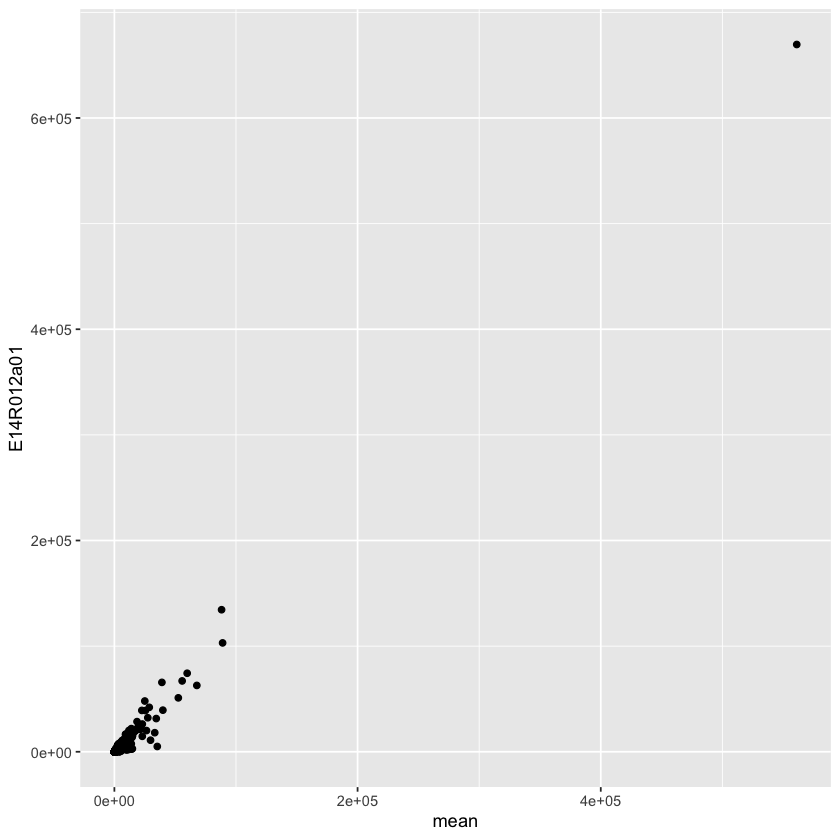

In [470]:
ggplot(table_with_mean, aes(x=mean, y=E14R012a01)) + geom_point()

1. 2. Linear scale with limit

Warning message:
"Removed 836 rows containing missing values (`geom_point()`)."


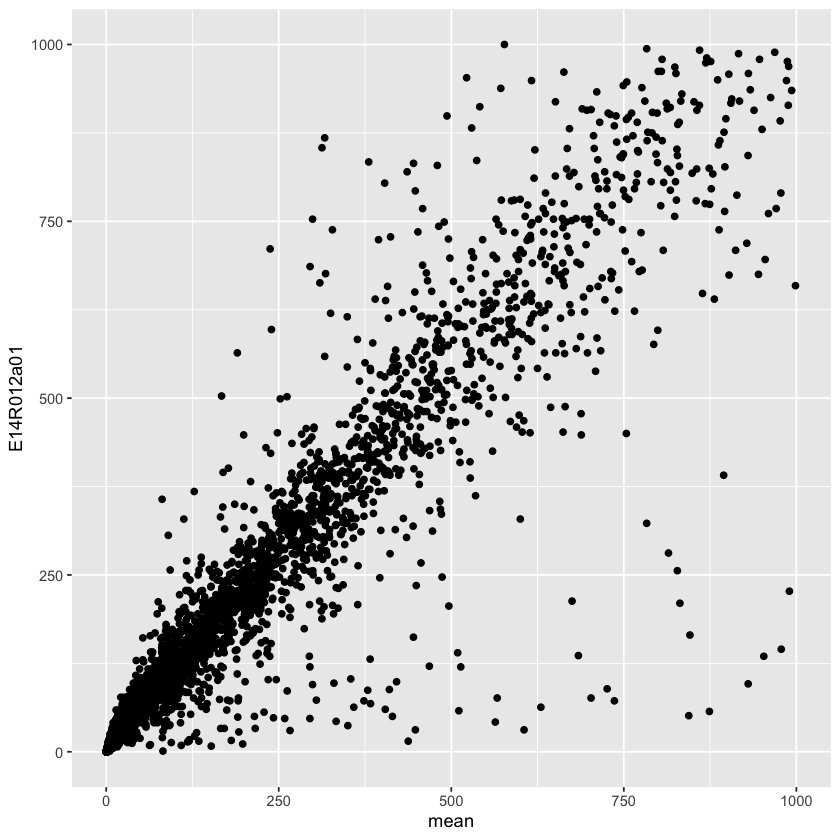

In [471]:
ggplot(table_with_mean, aes(x=mean, y=E14R012a01)) + geom_point() + xlim(0, 1000) + ylim(0, 1000)

1. 3. Logarithmic scale

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"


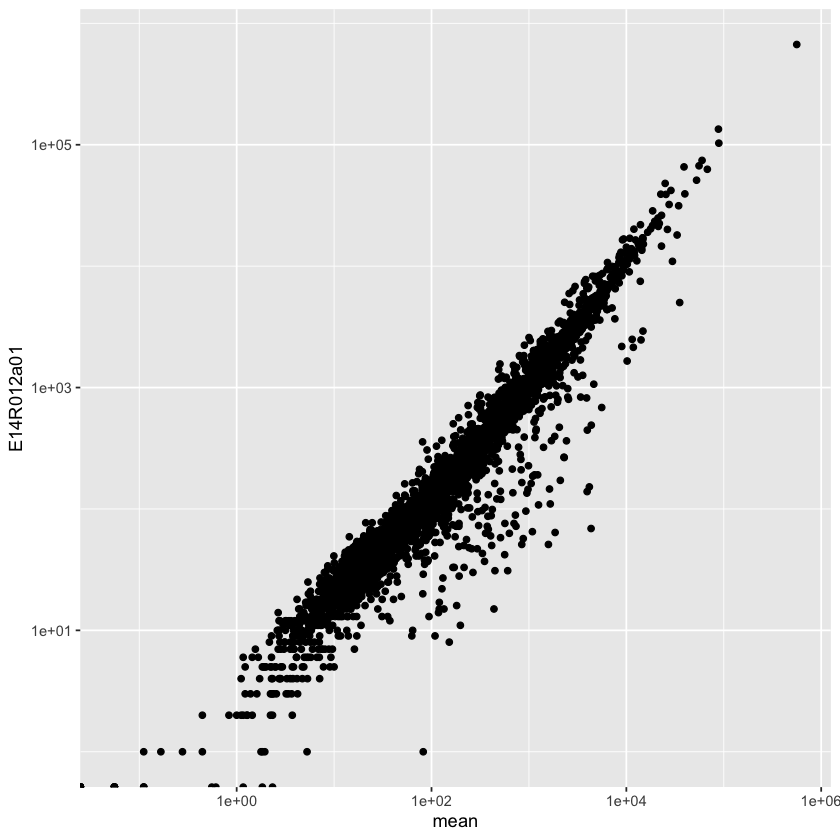

In [472]:
ggplot(table_with_mean, aes(x=mean, y=E14R012a01)) + geom_point() + scale_x_log10() + scale_y_log10()

1. 4. Logarithmic scale with limit

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


Warning message:
"Removed 881 rows containing missing values (`geom_point()`)."


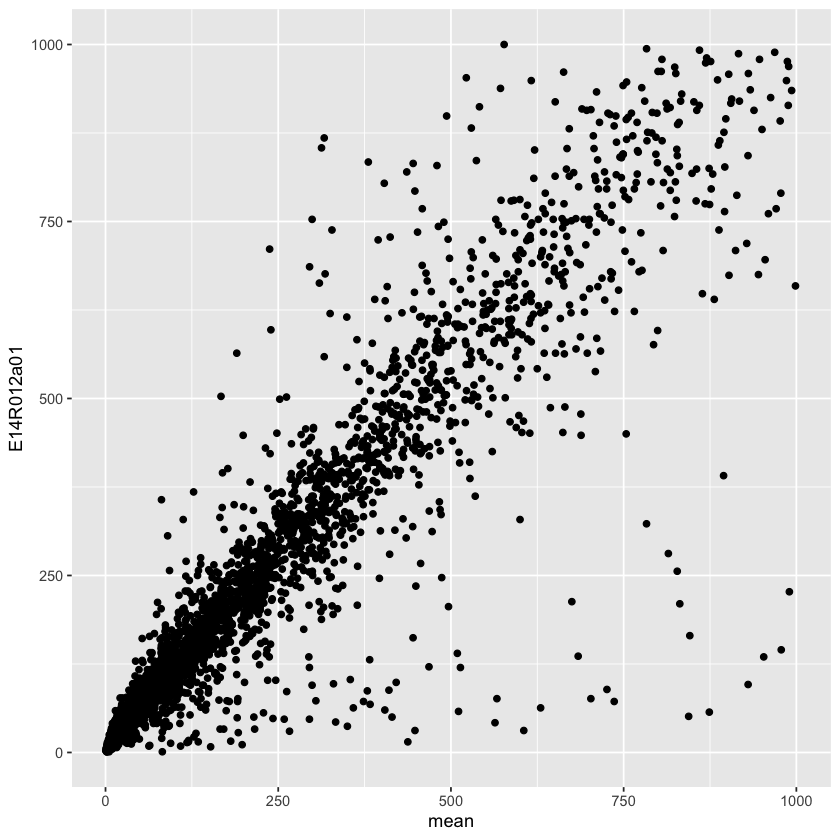

In [473]:
ggplot(table_with_mean, aes(x=mean, y=E14R012a01)) + geom_point() + scale_x_log10() + scale_y_log10() + xlim(1, 1000) + ylim(1, 1000)

2. Generate a ggplot2 bar plot showing the mean expression levels for the top 10 genes.

In [474]:
top_10_mean <- table_with_mean[order(-mean)][1:10]

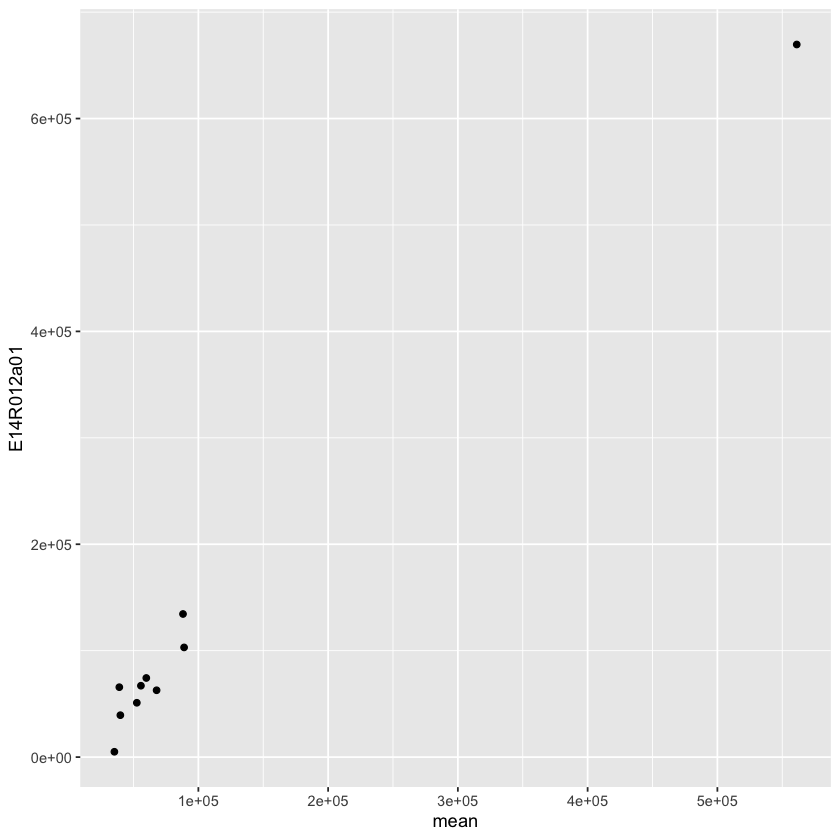

In [475]:
ggplot(top_10_mean, aes(x=mean, y=E14R012a01)) + geom_point()

### Task 1.2: Advanced Visualization

Create a ggplot2 scatter plot of expression levels in the first sample against mean expression levels and add a regression line.

1. 1. Linear scale

`geom_smooth()` using formula = 'y ~ x'


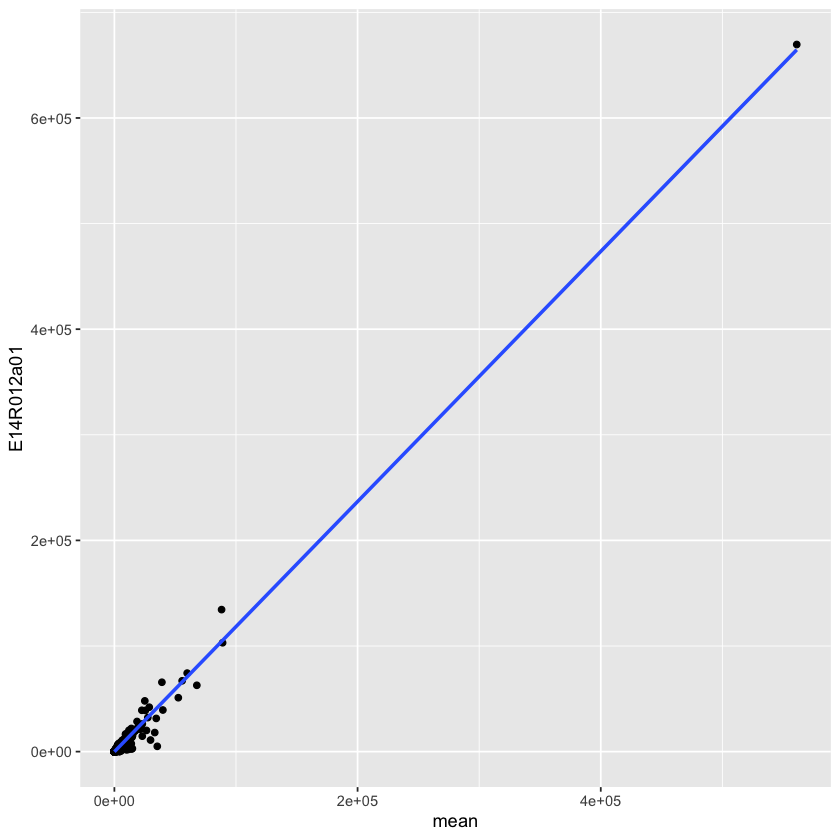

In [476]:
ggplot(table_with_mean, aes(x=mean, y=E14R012a01)) + geom_point() + stat_smooth(method = "lm")

1. 2. Linear scale with limit

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 836 rows containing non-finite values (`stat_smooth()`)."


Warning message:
"Removed 836 rows containing missing values (`geom_point()`)."


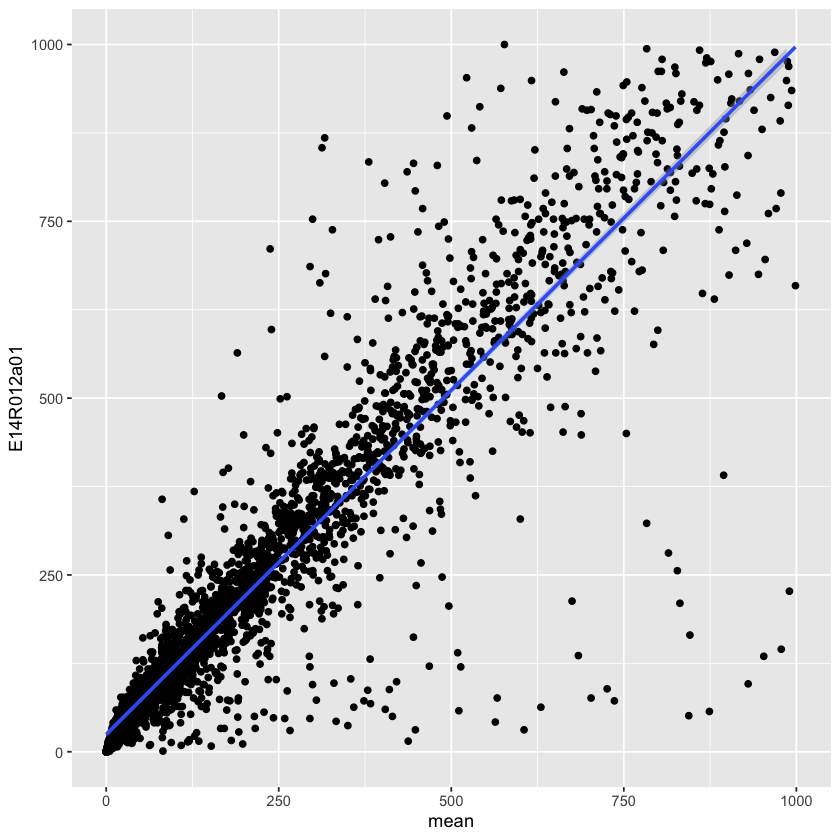

In [477]:
ggplot(table_with_mean, aes(x=mean, y=E14R012a01)) + geom_point() + xlim(0, 1000) + ylim(0, 1000) + stat_smooth(method = "lm")

1. 3. Logarithmic scale

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"


Warning message:
"Transformation introduced infinite values in continuous y-axis"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 39 rows containing non-finite values (`stat_smooth()`)."


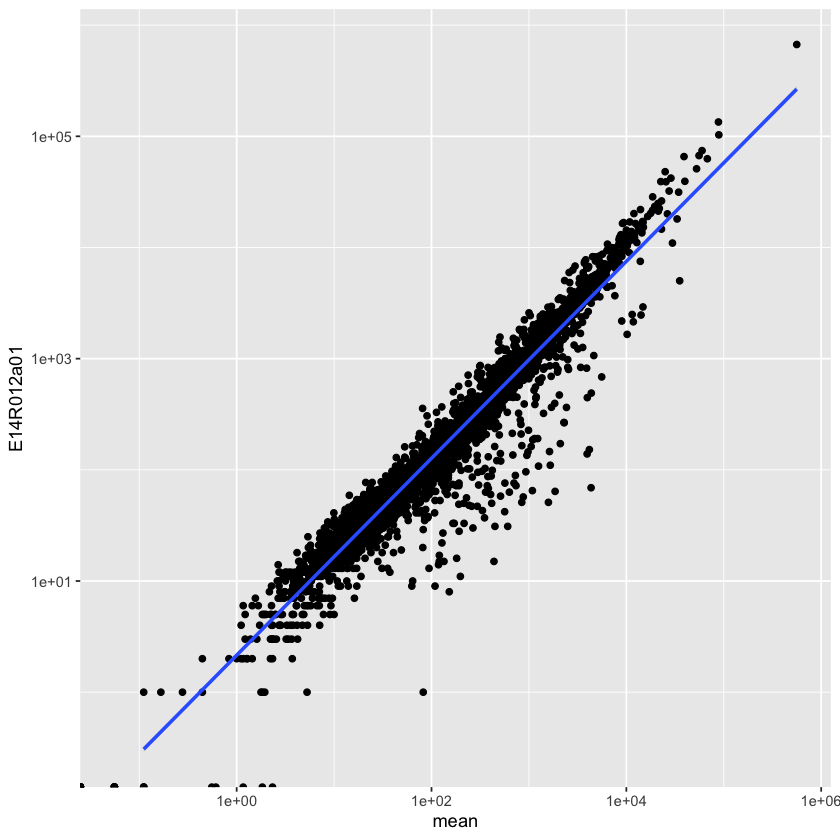

In [478]:
ggplot(table_with_mean, aes(x=mean, y=E14R012a01)) + geom_point() + scale_x_log10() + scale_y_log10()+ stat_smooth(method = "lm")

1. 4. Logarithmic scale with limit

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 881 rows containing non-finite values (`stat_smooth()`)."


Warning message:
"Removed 881 rows containing missing values (`geom_point()`)."


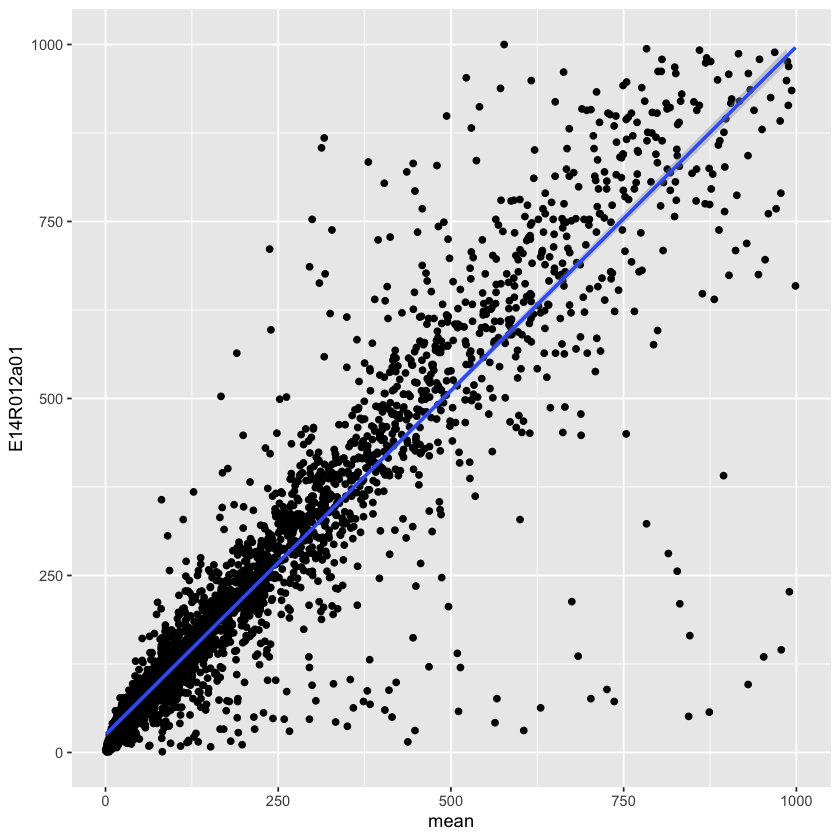

In [479]:
ggplot(table_with_mean, aes(x=mean, y=E14R012a01)) + geom_point() + scale_x_log10() + scale_y_log10() + xlim(1, 1000) + ylim(1, 1000)+ stat_smooth(method = "lm")

## Part 2: Statistical Analysis

### Task 2.1: Descriptive Statistics

Calculate the mean and standard deviation of expression levels in the first sample (E14R012a01)

In [480]:
first_sample <- original_table[,E14R012a01]
first_mean <- mean(first_sample)
first_sd <- sd(first_sample)

print(paste("Mean:", first_mean, ", SD:", first_sd))

[1] "Mean: 1180.98147719381 , SD: 11033.6301772998"


### Task 2.2: Hypothesis Testing

Perform a t-test to see if expression levels in the first and second samples (E14R012a01 and E14R012a02) are significantly different

In [481]:
first_sample <- original_table[,E14R012a01]
second_sample <- original_table[,E14R012a02]

t.test(first_sample, second_sample)
t.test(first_sample, second_sample, paired = TRUE)


	Welch Two Sample t-test

data:  first_sample and second_sample
t = 1.3619, df = 8090.3, p-value = 0.1733
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -126.5703  702.7972
sample estimates:
mean of x mean of y 
 1180.981   892.868 



	Paired t-test

data:  first_sample and second_sample
t = 7.2649, df = 4318, p-value = 4.407e-13
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 210.3628 365.8641
sample estimates:
mean difference 
       288.1135 


## Part 3: Principle Component Analysis (PCA)

### Task 3.1: Perform PCA

1. Transpose the dataset to make genes as columns

In [482]:
transposed_table <- transpose(copy(original_table), keep.names = "col", make.names = "...1")

2. Perform PCA on the transposed dataset

In [483]:

pca <-prcomp(transposed_table[,2:ncol(transposed_table)])
pca

Standard deviations (1, .., p=18):
 [1] 2.884752e+05 7.818235e+04 5.667087e+04 2.218946e+04 1.543047e+04
 [6] 1.215143e+04 1.079014e+04 8.610192e+03 7.064701e+03 6.353085e+03
[11] 4.935551e+03 3.744216e+03 2.534870e+03 2.281097e+03 1.901877e+03
[16] 1.619667e+03 1.225984e+03 4.037933e-11

Rotation (n x k) = (4319 x 18):
               PC1           PC2           PC3           PC4           PC5
aaeA -7.657676e-05 -5.397924e-05  2.421174e-04 -3.474186e-04  4.884187e-04
aaeB -6.719885e-05  1.799720e-05  1.489289e-04 -2.884756e-04  7.070230e-04
aaeR -3.068352e-04 -1.780839e-04  9.455647e-04 -6.993712e-04  6.802319e-04
aaeX -8.362251e-05 -1.813114e-05  1.699806e-04 -1.774688e-04  1.243382e-05
aas  -3.539348e-04 -3.197537e-04  9.558285e-04 -1.537632e-03  1.426307e-03
aat  -1.876359e-04 -9.086550e-06  7.270375e-04 -4.805042e-04  1.192750e-03
abgA -1.767427e-05  1.600978e-05  5.055060e-05 -4.005643e-05  2.142311e-04
abgB -6.921331e-05  2.621237e-05  1.740839e-04 -1.633947e-05  3.197594e-05
abg

3. Plot the first two principal components using ggplot2

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8,

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(0, 0, y[, 1L] * 0.8,

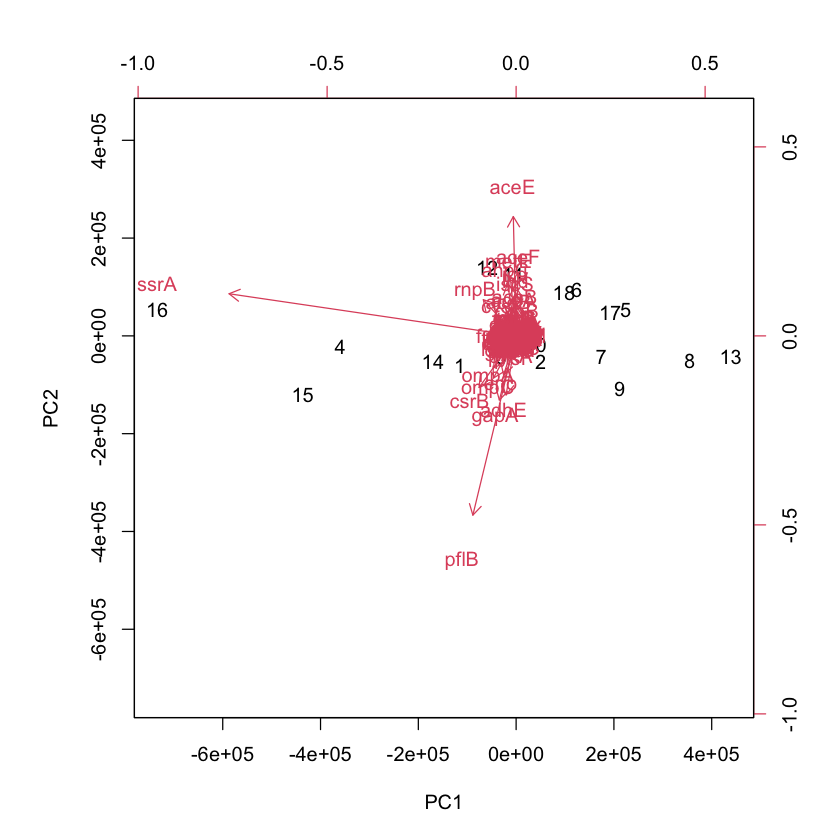

In [484]:
biplot(pca, scale = 0)

## Part 4: Jupyter Notebook Report

- Introduction: Use a Markdown cell to introduce the objective of this Notebook.
- Methodology: Explain the methods and libraries used in this Notebook.
- Results: All the code cells from Parts 1 to 4 serve as the results.
- Discussion: Use a Markdown cell to discuss the observations and interpretations of the tasks and results.
- Conclusion: Summarize the entire assignment and the findings in a Markdown cell.

#### Methodology

Basic Data Table manipulation, visualization, statistics, and PCA, and using 3 libraries (data.table, readxl, ggplot2)

#### Discussion

A lot of statistical and classification algorithms and methods are found by default inside R

#### Conclusion

The first two samples are not similar, and ssrA, and pflB genes are the most two dominant genes.